**Prakhar Sapkota** <br>
**2358543** <br>
**Task-2**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load train and test datasets
training_data = pd.read_csv("/content/drive/MyDrive/AIML-sem6/coursework/Racist Sexist or Not Dataset/train_racisit.csv")
testing_data = pd.read_csv("/content/drive/MyDrive/AIML-sem6/coursework/Racist Sexist or Not Dataset/test_racisit.csv")

# Display sample data
print("Train Data:")
print(training_data.head())
print("\nTest Data:")
print(testing_data.head())

Train Data:
   id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation

Test Data:
      id                                              tweet
0  31963  #studiolife #aislife #requires #passion #dedic...
1  31964   @user #white #supremacists want everyone to s...
2  31965  safe ways to heal your #acne!!    #altwaystohe...
3  31966  is the hp and the cursed child book up for res...
4  31967    3rd #bihday to my amazing, hilarious #nephew...


#NLTK Text Cleaning Function

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Define common English stop words
common_words = set(stopwords.words('english'))

def clean_text_content(input_data, method="lemmatize"):
  """
  This function performs a complete text cleaning process including:
  - Lowercasing
  - Removing URLs, emojis, and unwanted characters
  - Tokenization
  - Stopword removal
  - Lemmatization or stemming

  Args:
    input_data (str): Input text to be cleaned
    method (str): "lemmatize" (default) or "stem" to apply desired transformation

  Returns:
    str: Cleaned text string
  """

  def convert_to_lower(text):
    # Convert all characters to lowercase
    return text.lower()

  def eliminate_urls(text):
    # Remove URLs starting with http://, https://, or www.
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

  def eliminate_emoji(string):
    # Remove emojis and special pictographic symbols
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r' ', string)

  def remove_extra_characters(document):
    # Remove mentions, hashtags, and non-alphanumeric characters
    document = re.sub("@[A-Za-z0-9_]+", " ", document)  # Remove @mentions
    document = re.sub("#[A-Za-z0-9_]+", "", document)   # Remove hashtags
    document = re.sub("[^0-9A-Za-z ]", "", document)    # Keep only alphanumeric and spaces
    document = eliminate_emoji(document)                # Also remove any remaining emojis
    document = document.replace('  ', " ")              # Replace multiple spaces with one
    return document.strip()                             # Trim leading/trailing whitespace

  def filter_punctuation(text):
    # Tokenize and remove punctuation using regex tokenizer
    tokenizer = RegexpTokenizer(r"\w+")
    lst = tokenizer.tokenize(' '.join(text)) if isinstance(text, list) else tokenizer.tokenize(text)
    return lst

  def discard_stopwords(word_tokens):
    # Remove common English stop words from token list
    return [token for token in word_tokens if token not in common_words]

  def perform_lemmatizing(token_list):
    # Lemmatize tokens to their base form (using noun/verb POS tagging)
    wordnet = WordNetLemmatizer()
    lemmatized_words = [wordnet.lemmatize(token, pos='v') for token in token_list]
    return lemmatized_words

  def perform_stemming(word_list):
    # Stem words to their root form using PorterStemmer
    porter = PorterStemmer()
    stemmed_words = [porter.stem(word) for word in word_list]
    return stemmed_words

  # --- Text Cleaning Pipeline Execution ---
  content = convert_to_lower(input_data)           # Step 1: Convert to lowercase
  content = eliminate_urls(content)                # Step 2: Remove URLs
  content = eliminate_emoji(content)               # Step 3: Remove emojis
  content = remove_extra_characters(content)       # Step 4: Remove mentions, hashtags, and special chars
  tokens = filter_punctuation(content)             # Step 5: Tokenize and remove punctuation
  tokens = discard_stopwords(tokens)               # Step 6: Remove stop words

  # Step 7: Apply lemmatization or stemming
  if method == "lemmatize":
    tokens = perform_lemmatizing(tokens)
  elif method == "stem":
    tokens = perform_stemming(tokens)
  else:
    print("Pick between lemmatize or stem")
    return ""

  # Step 8: Join tokens back into a single string
  return " ".join(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Applying text cleaning to dataset

In [ ]:
from tqdm import tqdm
tqdm.pandas()

# Apply text cleaning to 'tweet' column in both training and testing datasets
train_df['cleaned_tweet'] = train_df['tweet'].progress_apply(lambda x: clean_text_content(x))
test_df['cleaned_tweet'] = test_df['tweet'].progress_apply(lambda x: clean_text_content(x))

# Display cleaned train data sample
print("Cleaned Train Data:")
print(train_df[['id', 'label', 'cleaned_tweet']].head())

100%|██████████| 17197/17197 [00:00<00:00, 17872.36it/s]

Cleaned Train Data:
   id  label                                      cleaned_tweet
0   1      0  father dysfunctional selfish drag kid dysfunction
1   2      0  thank credit cant use cause dont offer wheelch...
2   3      0                                     bihday majesty
3   4      0                              love u take u time ur
4   5      0                                 factsguide society


# Visualization : Word cloud

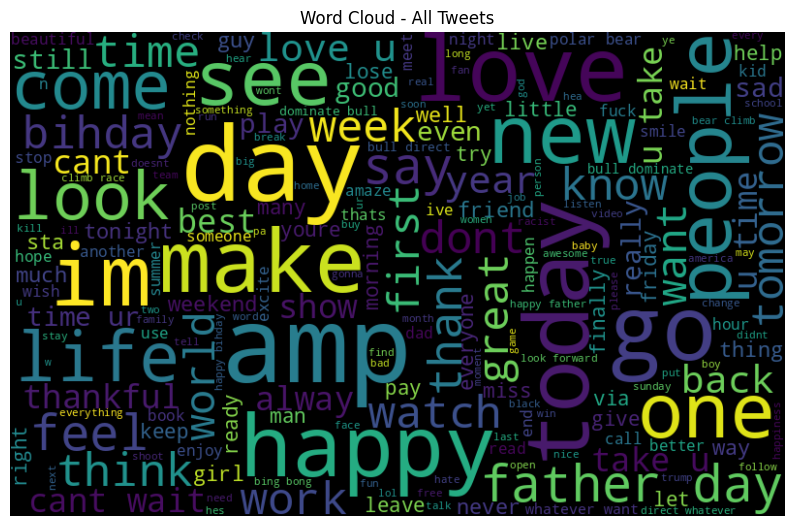

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all cleaned tweets into a single string
combined_text = ' '.join([text for text in train_df['cleaned_tweet']])

# Generate the word cloud
word_cloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(combined_text)

# Plot the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - All Tweets")
plt.show()

# Visualization : Top 25 Most Common Words

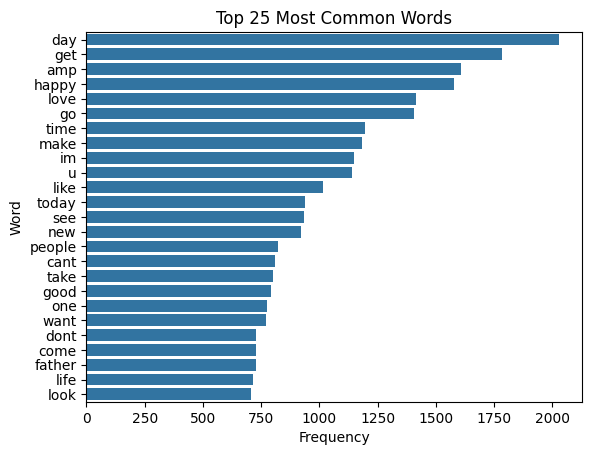

In [ ]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Extract all words from cleaned tweets
all_words_list = [word for sentence in train_df['cleaned_tweet'] for word in sentence.split()]

# Count the frequency of each word
word_frequencies = Counter(all_words_list).most_common(25)

# Create a DataFrame for visualization
freq_data = pd.DataFrame(word_frequencies, columns=['word', 'frequency'])

# Plot top 25 most common words
sns.barplot(x='frequency', y='word', data=freq_data)
plt.title("Top 25 Most Common Words")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()

# Tokenization, Padding and balanching classes using SMOTE

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from imblearn.over_sampling import SMOTE

# Initialize tokenizer to convert words to integers
text_tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
text_tokenizer.fit_on_texts(train_df['cleaned_tweet'])

# Convert text to sequences of integers
X_train_seq = text_tokenizer.texts_to_sequences(train_df['cleaned_tweet'])
X_test_seq = text_tokenizer.texts_to_sequences(test_df['cleaned_tweet'])

# Calculate max sequence length (90th percentile of train lengths)
sequence_lengths = [len(s) for s in X_train_seq]
max_length = int(np.percentile(sequence_lengths, 90))

# Pad and truncate sequences to uniform length
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

# Extract labels for training
y_train_labels = train_df['label'].values

# Check class distribution before resampling
print("Before SMOTE:", Counter(y_train_labels))

# Apply SMOTE to handle class imbalance
data_balancer = SMOTE(random_state=42)
X_balanced, y_balanced = data_balancer.fit_resample(X_train_pad, y_train_labels)

# Check class distribution after resampling
print("After SMOTE:", Counter(y_balanced))

# Update training data with balanced version
X_train_pad, y_train_labels = X_balanced, y_balanced

Before SMOTE: Counter({0: 29720, 1: 2242})
After SMOTE: Counter({0: 29720, 1: 29720})


# Building Model Architecture

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout

# Define a simple RNN-based neural network model
text_classification_model = Sequential([
    # Embedding layer: maps word indices to dense vectors
    Embedding(input_dim=10000, output_dim=64),

    # Simple RNN layer: processes sequence data to capture context
    SimpleRNN(64),

    # Dropout layer: helps prevent overfitting by randomly setting inputs to zero
    Dropout(0.5),

    # Output layer: binary classification using sigmoid activation
    Dense(1, activation='sigmoid')
])

In [ ]:
from tensorflow.keras.layers import LSTM

# Define an LSTM-based neural network model for text classification
lstm_classification_model = Sequential([
    # Embedding layer: converts word indices into dense embedding vectors
    Embedding(input_dim=10000, output_dim=64),

    # LSTM layer: captures long-term dependencies in sequence data
    LSTM(64),

    # Dropout layer: reduces overfitting during training
    Dropout(0.5),

    # Output layer: binary classification using sigmoid activation
    Dense(1, activation='sigmoid')
])

# Installing Gensim and Loading Pretrained Word2Vec Model

In [ ]:
!pip install --force-reinstall gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 67.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 93.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 7.3 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: smart-open
    Found existing installation: smart-open 7.1.0
    Uninstalling smart-open-7.1.0:
      Successfully uninstall

In [ ]:
import gensim.downloader as api


# Load pretrained Word2Vec (100-dimensional)
word2vec = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


# Creating Embedding Matrix

In [ ]:
# Define vocabulary size and embedding dimension
vocab_size_limit = 10000
embedding_dimensions = 300

# Initialize an embedding matrix with zeros
embedding_weights = np.zeros((vocab_size_limit + 1, embedding_dimensions))

# Populate embedding matrix with pre-trained Word2Vec vectors
for word, index in text_tokenizer.word_index.items():
    if index > vocab_size_limit:
        continue
    if word in word2vec:
        embedding_weights[index] = word2vec[word]

# Define LSTM model using pre-trained embeddings
lstm_with_pretrained_embeddings = Sequential([
    # Embedding layer: uses fixed pre-trained Word2Vec vectors
    Embedding(
        input_dim=vocab_size_limit + 1,
        output_dim=embedding_dimensions,
        weights=[embedding_weights],
        trainable=False
    ),

    # LSTM layer: processes sequence data to capture context
    LSTM(64),

    # Dropout layer: helps prevent overfitting
    Dropout(0.5),

    # Output layer: binary classification with sigmoid activation
    Dense(1, activation='sigmoid')
])

# Splitting Data into Training and Validation Sets

In [ ]:
from sklearn.model_selection import train_test_split

# Split training data into final training set and validation set
X_train_split, X_validation, y_train_split, y_validation = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# Configuring Callbacks and Class Weights

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Define early stopping to prevent overfitting during model training
early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Compute class weights to handle class imbalance in training data
class_distribution = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# Convert class weights to a dictionary for Keras compatibility
class_weights_mapping = dict(enumerate(class_distribution))

# Training Models

In [ ]:
# Train the first model (Simple RNN) with early stopping and class weights
training_history_1 = text_classification_model.fit(
    X_train_split, y_train_split,
    validation_data=(X_validation, y_validation),
    epochs=50,
    batch_size=64,
    callbacks=[early_stopping_callback],
    class_weight=class_weights_mapping
)

# Train the second model (LSTM) with early stopping and class weights
training_history_2 = lstm_classification_model.fit(
    X_train_split, y_train_split,
    validation_data=(X_validation, y_validation),
    epochs=50,
    batch_size=64,
    callbacks=[early_stopping_callback],
    class_weight=class_weights_mapping
)

# Train the third model (LSTM with pre-trained embeddings) with early stopping and class weights
training_history_3 = lstm_with_pretrained_embeddings.fit(
    X_train_split, y_train_split,
    validation_data=(X_validation, y_validation),
    epochs=50,
    batch_size=64,
    callbacks=[early_stopping_callback],
    class_weight=class_weights_mapping
)

Epoch 1/50
743/743 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - Precision: 0.6881 - Recall: 0.6732 - accuracy: 0.6838 - loss: 0.5824 - val_Precision: 0.7854 - val_Recall: 0.6811 - val_accuracy: 0.7453 - val_loss: 0.5158
Epoch 2/50
743/743 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - Precision: 0.8483 - Recall: 0.7968 - accuracy: 0.8276 - loss: 0.3898 - val_Precision: 0.7602 - val_Recall: 0.7150 - val_accuracy: 0.7425 - val_loss: 0.5257
Epoch 3/50
743/743 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - Precision: 0.9043 - Recall: 0.8668 - accuracy: 0.8876 - loss: 0.2769 - val_Precision: 0.7539 - val_Recall: 0.7000 - val_accuracy: 0.7334 - val_loss: 0.5956
Epoch 4/50
743/743 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - Precision: 0.9341 - Recall: 0.9011 - accuracy: 0.9188 - loss: 0.2111 - val_Precision: 0.7329 - val_Recall: 0.7397 - val_accuracy: 0.7328 - val_loss: 0.6887
Epoch 1/50
743/743 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - Precision: 0.6671 - Recall: 0.6076 - accuracy: 0.6541 - loss: 0.6087 - val_Precision: 0.7097 - val

# Plotting Training History

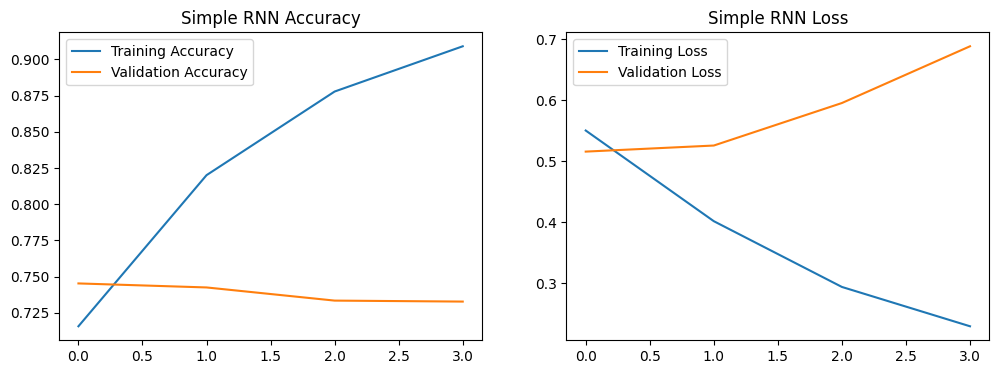

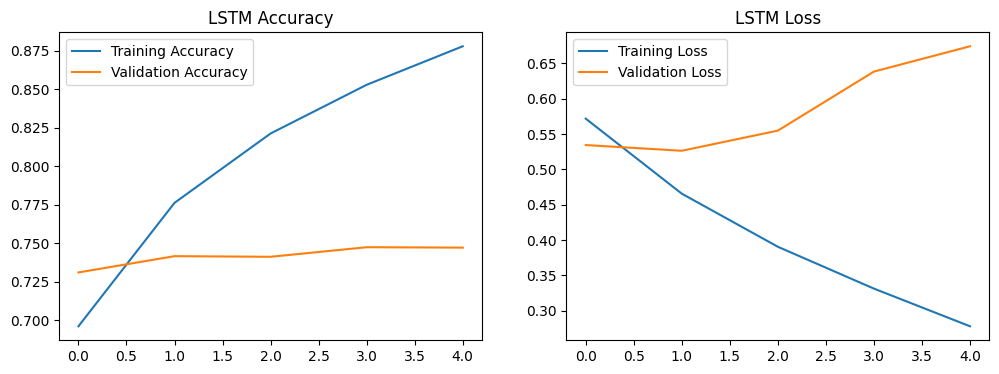

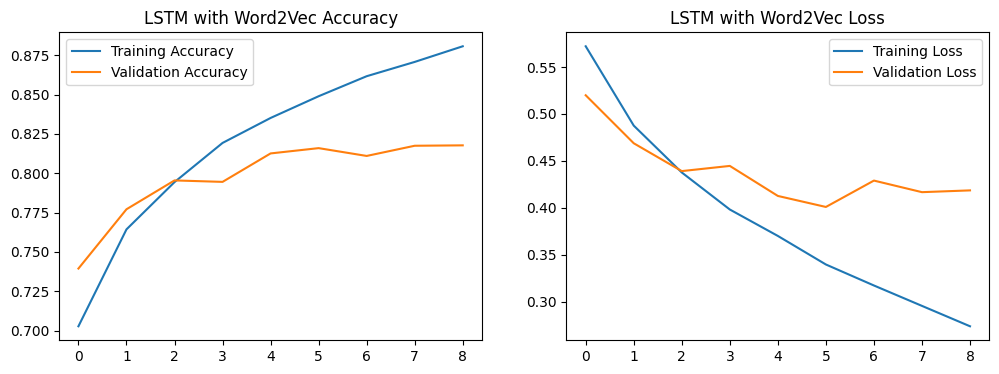

In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(training_log, model_identifier):
    # Set up the figure for side-by-side plots
    plt.figure(figsize=(12, 4))

    # Plot for Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(training_log.history['accuracy'], label='Training Accuracy')
    plt.plot(training_log.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_identifier} - Accuracy')
    plt.legend()

    # Plot for Loss
    plt.subplot(1, 2, 2)
    plt.plot(training_log.history['loss'], label='Training Loss')
    plt.plot(training_log.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_identifier} - Loss')
    plt.legend()

    plt.show()

# Visualize training history for each model
plot_training_history(training_history_1, "Simple RNN")
plot_training_history(training_history_2, "LSTM")
plot_training_history(training_history_3, "LSTM with Word2Vec Embeddings")

# Model Summaries

In [ ]:
# Compile and summarize the Simple RNN model
text_classification_model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'Precision', 'Recall']
)
text_classification_model.summary()

# Compile and summarize the LSTM model
lstm_classification_model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'Precision', 'Recall']
)
lstm_classification_model.summary()

# Compile and summarize the LSTM with pre-trained embeddings model
lstm_with_pretrained_embeddings.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'Precision', 'Recall']
)
lstm_with_pretrained_embeddings.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (64, 11, 64)           │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (64, 64)               │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (64, 64)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (64, 1)                │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 648,321 (2.47 MB)

 Trainable params: 648,321 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (64, 11, 64)           │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (64, 64)               │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (64, 64)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (64, 1)                │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 673,089 (2.57 MB)

 Trainable params: 673,089 (2.57 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (64, 11, 300)          │     3,000,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (64, 64)               │        93,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (64, 64)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (64, 1)                │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,093,805 (11.80 MB)

 Trainable params: 93,505 (365.25 KB)

 Non-trainable params: 3,000,300 (11.45 MB)

# Evaluating Model Performance

372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report for Simple RNN:
              precision    recall  f1-score   support

           0       0.71      0.81      0.76      5892
           1       0.79      0.68      0.73      5996

    accuracy                           0.75     11888
   macro avg       0.75      0.75      0.74     11888
weighted avg       0.75      0.75      0.74     11888



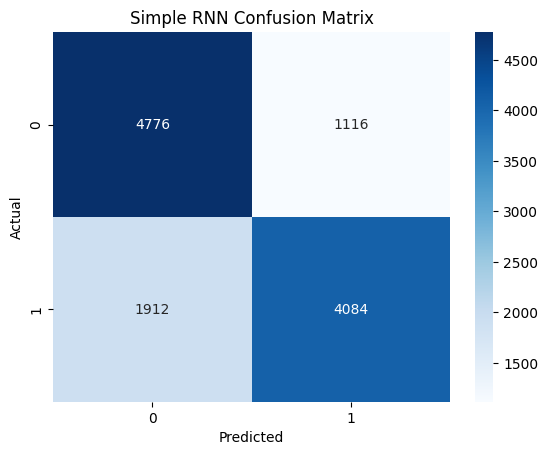

372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Classification Report for LSTM:
              precision    recall  f1-score   support

           0       0.73      0.76      0.74      5892
           1       0.75      0.72      0.74      5996

    accuracy                           0.74     11888
   macro avg       0.74      0.74      0.74     11888
weighted avg       0.74      0.74      0.74     11888



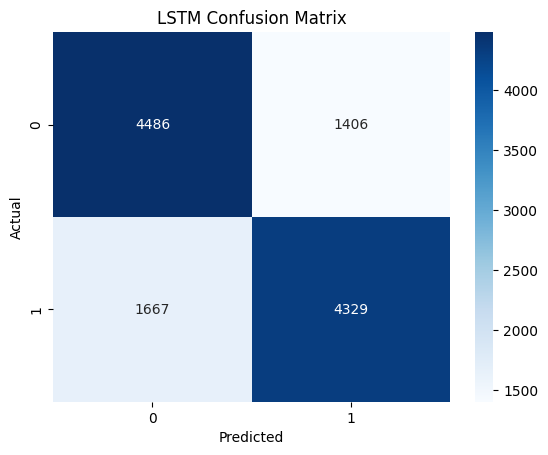

372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Classification Report for LSTM with Word2Vec:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      5892
           1       0.83      0.80      0.81      5996

    accuracy                           0.82     11888
   macro avg       0.82      0.82      0.82     11888
weighted avg       0.82      0.82      0.82     11888



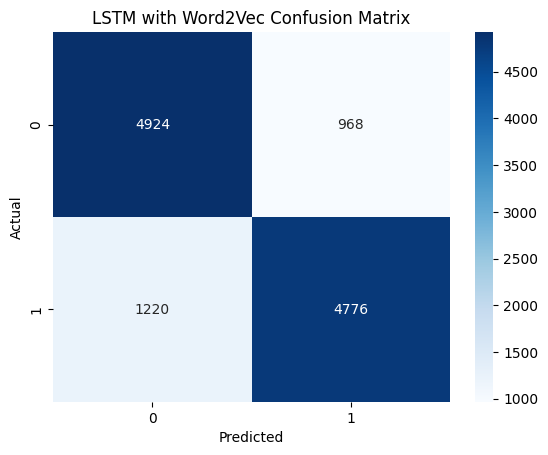

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

def model_evaluation(model, X_val_data, y_val_data, model_identifier):
    # Predict classes based on model output
    predictions = (model.predict(X_val_data) > 0.5).astype(int)

    # Print classification report
    print(f"Classification Report for {model_identifier}:")
    print(classification_report(y_val_data, predictions))

    # Generate and display confusion matrix
    cm = confusion_matrix(y_val_data, predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_identifier} - Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

# Evaluate all models on validation data
model_evaluation(text_classification_model, X_validation, y_validation, "Simple RNN")
model_evaluation(lstm_classification_model, X_validation, y_validation, "LSTM")
model_evaluation(lstm_with_pretrained_embeddings, X_validation, y_validation, "LSTM with Word2Vec Embeddings")

# Saving the Best Model

In [ ]:
import tensorflow as tf

# Save the best performing model
tf.keras.models.save_model(model3, 'my_model.h5')

In [ ]:
import pickle

with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

In [ ]:
import json
with open("config.json", "w") as f:
    json.dump({"max_len": max_len}, f)